In [1]:
# !pip install pandas
# !pip install watermark
# !pip install seaborn
# !pip install biopython|
# !pip install sklearn
import os
import re 
# from Bio import SeqIO
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np 
import watermark
import random 
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
from multiprocessing import Pool
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [2]:
left=3
right=9
signal_num=left+right

In [3]:
# 全局变量设定
signal_num = left+right
bases="ACGT"
lower_bases="acgt"
pattern = re.compile("[^acgt]")

In [4]:
output_name = "output/BN"
train_features_df = pd.read_csv(f'{output_name}/Train_features.csv')
test_file_df = pd.read_csv(f"{output_name}/Test_predict.csv")
test_features_df = pd.read_csv(f"{output_name}/Test_features.csv")

In [17]:
train_p=train_features_df[train_features_df["Label"]==1]

In [6]:
random_num=2080
random_state=123123
train_n=train_features_df[train_features_df["Label"]==0].sample(random_num,random_state=random_state).reset_index(drop=True)
train_df = pd.concat([train_p,train_n])
train_df

,-3,-2,-1,0,1,2,3,4,5,6,7,8,Label
0,0,2,3,2,3,0,0,2,3,0,3,1,1
1,3,3,1,2,3,0,0,2,3,0,1,1,1
2,0,2,2,2,3,0,0,2,0,2,0,2,1
3,1,0,2,2,3,2,2,2,2,2,1,1,1
4,2,0,2,2,3,2,0,2,3,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,3,2,2,2,3,1,3,1,1,3,2,0,0
2076,2,2,2,2,3,1,0,0,2,1,1,1,0
2077,0,0,2,2,3,2,2,0,2,2,3,1,0
2078,2,3,2,2,3,3,2,2,1,2,2,1,0


In [18]:
train_p.iloc[:,:-1]

,-3,-2,-1,0,1,2,3,4,5,6,7,8
0,0,2,3,2,3,0,0,2,3,0,3,1
1,3,3,1,2,3,0,0,2,3,0,1,1
2,0,2,2,2,3,0,0,2,0,2,0,2
3,1,0,2,2,3,2,2,2,2,2,1,1
4,2,0,2,2,3,2,0,2,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2375,1,0,2,2,3,0,2,2,3,2,2,1
2376,0,0,2,2,3,0,0,2,3,2,2,1
2377,0,1,0,2,3,2,0,2,3,0,2,3
2378,2,0,0,2,3,2,0,2,3,1,1,2


In [7]:
test_fl_df = test_features_df.copy()

In [8]:
test_fl_df["Label"] = test_file_df["label"]

In [9]:
test_fl_df

,-3,-2,-1,0,1,2,3,4,5,6,7,8,Label
0,2,2,2,2,3,2,0,2,1,1,1,0,1
1,2,3,2,2,3,0,0,2,0,2,0,1,1
2,3,0,2,2,3,2,0,2,3,2,3,2,1
3,2,1,2,2,3,0,2,2,3,0,1,3,1
4,1,0,2,2,3,0,0,3,3,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151200,3,0,0,2,3,3,0,0,0,3,1,0,0
151201,0,3,0,2,3,2,2,1,1,3,0,1,0
151202,3,2,0,2,3,3,3,1,3,2,3,3,0
151203,3,1,3,2,3,3,0,3,2,3,2,2,0


## 贝叶斯网络

In [10]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BDeuScore, K2Score, BicScore
hc = HillClimbSearch(train_df, scoring_method=BDeuScore(train_df ))
best_model = hc.estimate()
print(best_model.edges())

  0%|                                                                          | 20/1000000 [00:03<43:55:21,  6.32it/s]

[('-2', '-3'), ('-1', '-2'), ('2', '3'), ('4', 'Label'), ('4', '5'), ('4', '3'), ('4', '2'), ('4', '-2'), ('5', '-1'), ('5', 'Label'), ('6', '5'), ('6', '4'), ('7', '6'), ('8', '7'), ('Label', '-1'), ('Label', '2'), ('Label', '3'), ('Label', '-2'), ('Label', '-3')]


In [14]:
# !pip install pomegranate

In [15]:
from pomegranate import *   

In [19]:

donor_model=BayesianNetwork.from_samples(train_p.iloc[:,:-1]) 

In [39]:
pseudo_model=BayesianNetwork.from_samples(train_n.iloc[:,:-1])

In [35]:
# donor_model

In [33]:
donor_model.structure

((1,),
 (2, 3, 4),
 (3, 4, 7),
 (),
 (3,),
 (7,),
 (7,),
 (3, 4),
 (2,),
 (8,),
 (9,),
 (10,))

In [42]:
train_p_array=np.array(train_p.iloc[:,:-1])
train_n_array=np.array(train_n.iloc[:,:-1])

In [43]:
print(donor_model.probability(train_p_array))

[1.90608075e-05 5.18829208e-06 4.04592403e-05 ... 1.70613420e-05
 1.40362593e-05 7.85795856e-06]


[6.06048580e-09 2.33180435e-07 6.18924163e-08 ... 1.06941379e-06
 1.15003892e-07 5.87521563e-07]


In [16]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator

model = BayesianModel(best_model.edges())
model.fit(train_df, estimator=BayesianEstimator, prior_type="BDeu") # default equivalent_sample_size=5
# predict_data=train_df.drop(['0','1','Label'],axis=1)
# y_pred =model.predict(predict_data)
# (y_pred['Label']==train_df['Label'].reset_index(drop=True)).sum()/len(test)#测试集精度

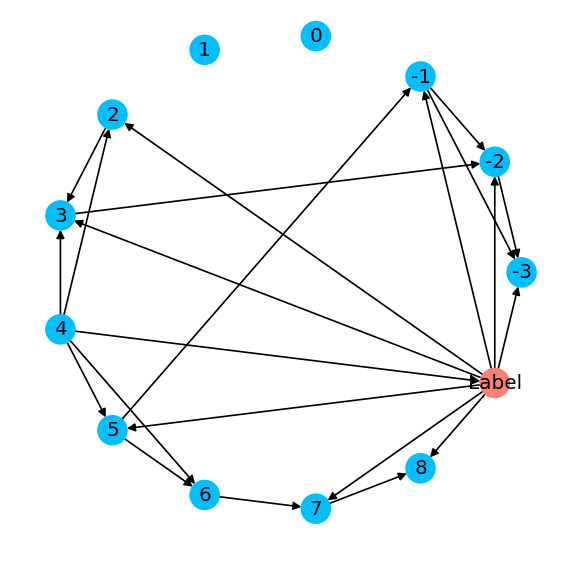

In [17]:
import pygraphviz
import networkx as nx
model_temp=model.copy()
model_temp.add_nodes_from([ node for node in train_features_df.columns 
                                          if not model_temp.has_node([node]) ])
fig, ax1 = plt.subplots(1, 1, figsize=(6,6), dpi=120)
G1 = model_temp
def func(info):
    if info[0] == "Label":
        return 99
    else:
#         print(info)
        return int(info[0])

H = nx.DiGraph()
H.add_nodes_from(sorted(G1.nodes(data=True), key=func))
H.add_edges_from(G1.edges(data=True))

bicolors = ['deepskyblue','salmon']
nodesize = np.array([float(H.degree(v) + 1) for v in H])
nodecolor = np.array([bicolors[int('Label' == i)] for i in H])
nx.draw(H, with_labels=True, node_color=nodecolor,pos = nx.kamada_kawai_layout(H),
         ax=ax1)
fig.savefig(f'{output_name}/network.png',dpi=120)

In [18]:
test_features_df_drop=test_features_df.drop(['0','1'],axis=1)
BN_test_labels = test_file_df["label"]

In [20]:
model.predict(test_features_df_drop[-1000:]).sum()

100%|████████████████████████████████████████████████████████████████████████████████| 986/986 [00:27<00:00, 36.45it/s]


Label    73
dtype: int64

In [21]:
default_predict =model.predict(test_features_df_drop)
default_predict.to_csv(f"{output_name}/default_predict.csv",index=None)

  6%|████▋                                                                       | 6928/113523 [03:20<46:03, 38.57it/s]

KeyboardInterrupt: 

In [62]:
default_predict

,Label
0,1
1,1
2,1
3,1
4,1
...,...
151200,0
151201,0
151202,0
151203,0


## Evaluation

In [25]:
from sklearn.metrics import confusion_matrix
def save_to_file(file_name, contents,mode='a+'):
    fh = open(file_name, mode)
    fh.write(contents)
    fh.close()
def draw_confusion_matrix(labels,predicts,name,size=(6, 6),mode='a+',threshold="Default"):
    mat = confusion_matrix(labels,predicts)
    TP = mat[1][1]
    FP = mat[0][1]
    TN = mat[0][0]
    FN = mat[1][0]
    recall  = TP/(FN+TP)
    precision = TP/(FP+TP)
    acc = (TP+TN)/np.sum(mat)
    fpr =  FP/(TN+ FP)
    f1_score = 2*precision*recall/(precision+recall)
    print(f"Precision :{precision}, Recall:{recall},f1_score:{f1_score},Acc:{acc},FPR:{fpr},Sp:{1-fpr}")
    save_to_file(f'{output_name}/WAM_predict.txt', f"\nPrecision :{precision}, Recall:{recall},f1_score:{f1_score},Acc:{acc} \n",mode)

    f, ax = plt.subplots(figsize=size)
    sns.set()
    sns.heatmap(mat, square=True, annot=True, fmt='d',cmap='Blues' ,cbar=False,
                xticklabels=['pseudo donor','real donor'],
                yticklabels=['pseudo donor','real donor'],)
    ax.set_xlabel(f'Predicted label\nPrecision :{precision:.2f}, Recall:{recall:.2f},F1_score:{f1_score:.2f}')
    ax.set_ylabel(f'True label');
    plt.title(f"Confusion Matrix(Threshold:{threshold})\n",fontsize=15)
    f.savefig(f"{output_name}/plot_{name}.png",dpi=120)

In [26]:
draw_confusion_matrix(test_labels,default_predict,name="BN_default_predict")

NameError: name 'default_predict' is not defined

In [65]:

y_pred =model.predict_probability(test_features_df_drop)


In [75]:
y_pred.to_csv(f"{output_name}/BN2_predict_scores.csv",index=None)

In [5]:
import numpy as np
import pandas as pd

In [14]:
y_pred=pd.read_csv(f"{output_name}/BN2_predict_scores.csv")
BN_predict_scores = np.log(y_pred['Label_1']/y_pred['Label_0'])
BN_test_labels= pd.read_csv(f"{output_name}/Test_predict.csv")["label"]

In [15]:
WAM_predict_scores = pd.read_csv("output/WAM(-4+6)/WAM_predict_scores.csv")["scores"]
WAM_test_labels   = pd.read_csv("output/WAM(-4+6)/WAM_predict_scores.csv")["labels"]

In [16]:
# SVM_RBF_labels = [1]*2079+[0]*149255
# SVM_RBF_scores = pd.read_csv("SVMoutput/SVM_predict_probs.csv")['RBF']

In [17]:
SVM_test_labels = [1]*2079+[0]*148357

In [18]:
BN_predict_scores

0         2.511116
1         2.273607
2         3.684759
3         4.037911
4         2.371450
            ...   
151200   -5.809173
151201   -6.659129
151202   -8.423163
151203   -6.082267
151204   -6.390975
Length: 151205, dtype: float64

In [19]:
# SVM_test_labels =pd.read_csv("SVMoutput/Test_predict.csv")['label']
# SVM_RBF_scores = pd.read_csv("SVMoutput/SVM_predict_scores.csv")['RBF']
SVM_linear_scores = pd.read_csv("SVMoutput/SVM_predict_scores.csv")['linear']
SVM_poly_scores = pd.read_csv("SVMoutput/SVM_predict_scores.csv")['poly']

In [20]:
# test_labels = [WAM_test_labels,BN_test_labels,SVM_RBF_labels,SVM_test_labels,SVM_test_labels]
# test_scores = [WAM_predict_scores,BN_predict_scores,SVM_RBF_scores,SVM_linear_scores,SVM_poly_scores]
test_labels = [WAM_test_labels,BN_test_labels,SVM_test_labels,SVM_test_labels]
test_scores = [WAM_predict_scores,BN_predict_scores,SVM_linear_scores,SVM_poly_scores]

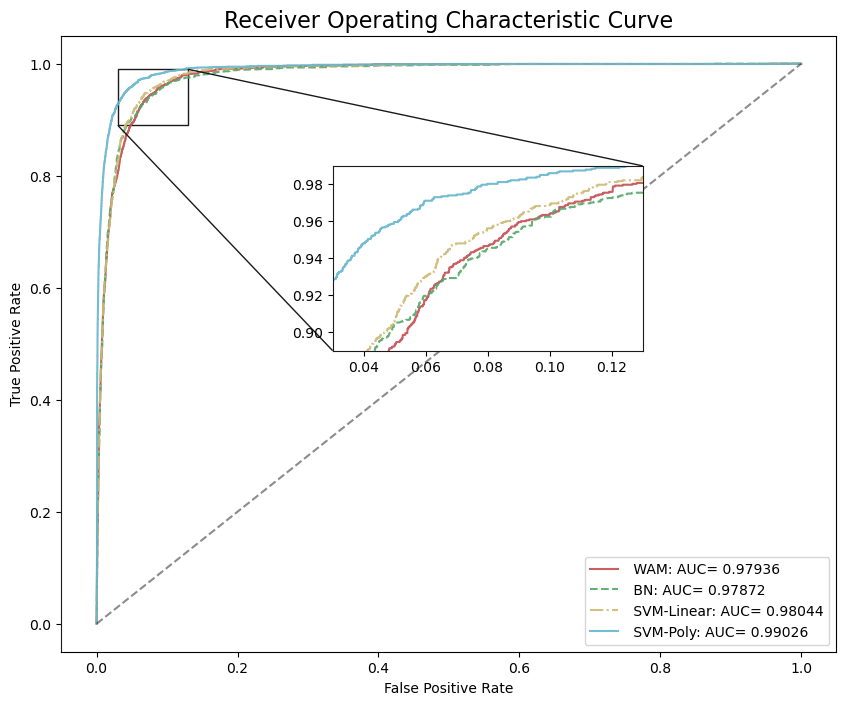

In [29]:
# ROC plot
# problem ： 如何画不同核的图在一个图里
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
import matplotlib.pyplot as plt
def Find_Optimal_Cutoff(TPR, FPR, threshold):
    y = TPR - FPR
    Youden_index = np.argmax(y)  # Only the first occurrence is returned.
    optimal_threshold = threshold[Youden_index]
    point = [FPR[Youden_index], TPR[Youden_index]]
    return optimal_threshold, point

def plot_roc(labels, predict_probs, titles):
    color = ['r', 'g', 'y','c','m']                                                                 
    linestyles = ['-','--','-.']
#     markers = ['v','o','p','+','1','D',',','.']
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    for idx, predict_prob in enumerate(predict_probs):
        fpr, tpr,thresholds=roc_curve(labels[idx], predict_prob)
        roc_auc=auc(fpr, tpr)
        if idx==1:
            optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds)
        c = color[idx%len(color)]                                                                     
        l =linestyles[idx%len(linestyles)]
#         m = markers [idx%len( markers )]
        ax.plot(fpr, tpr,'b',label=f' {titles[idx]}: AUC= {roc_auc:.5f}', color=c, linestyle=l, alpha=0.9,markevery=20)  
        ax.legend(loc='lower right')
    # 
    axins = inset_axes(ax, width="40%", height="30%",loc='upper center',
                   bbox_to_anchor=(0.05, -0.2, 1, 1),
                   bbox_transform=ax.transAxes)
    for idx, predict_prob in enumerate(predict_probs):
        false_positive_rate,true_positive_rate,thresholds=roc_curve(labels[idx], predict_prob)
        roc_auc=auc(false_positive_rate, true_positive_rate)
        c = color[idx%len(color)]                                                                     
        l =linestyles[idx%len(linestyles)]
        
#         m = markers [idx%len( markers )]
        axins.plot(false_positive_rate, true_positive_rate,'b', color=c, linestyle=l, alpha=0.9,markevery=20)  

    axins.set_xlim(0.03, 0.13)
    axins.set_ylim(0.89, 0.99)
    #
    mark_inset(ax, axins, loc1=3,loc2=1, fc="none", ec='k', lw=1)
    ax.plot([0,1],[0,1],'k--',alpha=0.5)
    ax.set_title("Receiver Operating Characteristic Curve",fontsize=16)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")

    ax.spines['left'].set_color('k')
    [axins.spines[loc_axis].set_color('k') for loc_axis in ['top','right','bottom','left']]
    plt.savefig(f'{output_name}/plot_ROC.png',dpi=120)
    plt.show()
    return optimal_th

plt.style.use('default')

optimal_th=plot_roc(test_labels,test_scores,titles=["WAM","BN","SVM-Linear","SVM-Poly"])



In [31]:
print(optimal_th)

0.14942363702611025


Precision :0.12425335988053758, Recall:0.9605579605579606,f1_score:0.22004297283896207,Acc:0.9063721437783142,FPR:0.09438327320520902,Sp:0.905616726794791


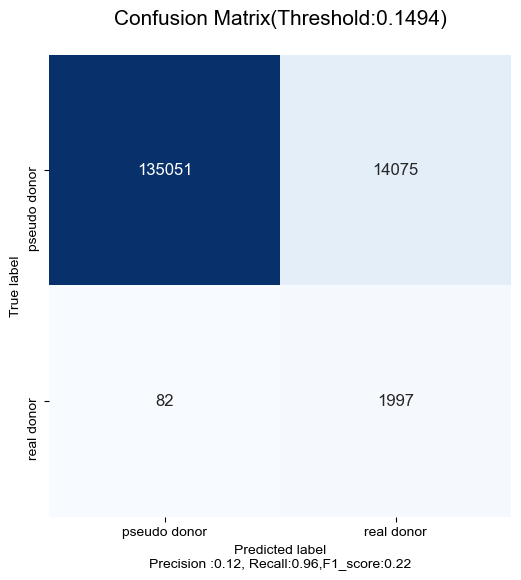

In [32]:
predict_label =[1 if i >optimal_th else 0 for i in BN_predict_scores ]
draw_confusion_matrix(BN_test_labels, predict_label,name=f"confusion_matrix_ROC_best",threshold=f'{optimal_th:.4f}')

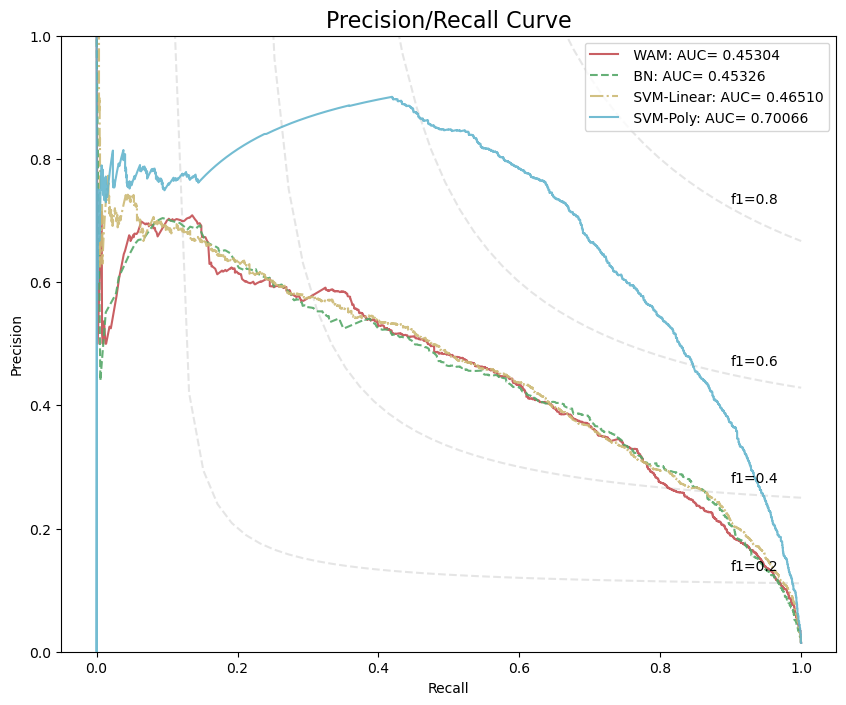

In [38]:
from sklearn.metrics import precision_recall_curve


# def plot_pr(labels, predict_probs):
#     plt.figure(figsize=(8, 6))
#     precision, recall, thresholds = precision_recall_curve(labels, predict_probs)
#     pr_auc=auc(recall, precision)
#     print(precision)
#     f_scores = np.linspace(0.2, 0.8, num=4)
#     for f_score in f_scores:
#         x = np.linspace(0.01, 1)
#         y = f_score * x / (2 * x - f_score)
#         l, = plt.plot(x[y >= 0], y[y >= 0], color='gray',linestyle='--' ,alpha=0.2)
#         plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))
        
#     plt.plot(recall,precision,'b',label=f'BN:AUC={pr_auc:.4f}', alpha=0.8,color="#135200")  
#     plt.legend(loc='lower right')
#     plt.plot([0,1],[1,0],'k--',alpha=0.5)
#     plt.title('Precision/Recall Curve',fontsize=16)# give plot a title
#     plt.xlabel('Recall')# make axis labels
#     plt.ylabel('Precision')
#     plt.ylim(0,1.05)
#     plt.legend(loc="upper right")
#     f = plt.gcf()  #获取当前图像
#     f.savefig(f'{output_name}/Plot_PR.png',dpi=120)
#     plt.show()
#     return thresholds
def plot_pr(labels, predict_probs, titles):
    color = ['r', 'g',  'y','c','m']                                                                 
    linestyles = ['-','--','-.']
    plt.figure(figsize=(10, 8))
    f_scores = np.linspace(0.2, 0.8, num=4)
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray',linestyle='--' ,alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))
    for idx, predict_prob in enumerate(predict_probs):
        precision, recall, thresholds = precision_recall_curve(labels[idx], predict_prob)
        pr_auc=auc(recall, precision)
        c = color[idx%len(color)]                                                                     

        l =linestyles[idx%len(linestyles)]
        plt.plot(recall,precision,'b',label=f' {titles[idx]}: AUC= {pr_auc:.5f}',color=c, linestyle=l, alpha=0.9,markevery=20)  
        plt.legend(loc='lower right')
    plt.ylim(0,1)
    # plt.plot([0,1],[1,0],color='gray',linestyle='--',alpha=0.5)
    plt.title('Precision/Recall Curve',fontsize=16)# give plot a title
    plt.xlabel('Recall')# make axis labels
    plt.ylabel('Precision')
    plt.legend(loc="upper right")
    f = plt.gcf()  
    f.savefig(f'{output_name}/plot_PR.png',dpi=120)
    plt.show()
plt.style.use('default')
thresholds=plot_pr(test_labels,test_scores,titles=["WAM","BN","SVM-Linear","SVM-Poly"])

# y_true = np.array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])
# y_scores = np.array([0.9, 0.75, 0.86, 0.47, 0.55, 0.56, 0.74, 0.62, 0.5, 0.86, 0.8, 0.47, 0.44, 0.67, 0.43, 0.4, 0.52, 0.4, 0.35, 0.1])
# plot_pr(y_true ,y_scores)

In [34]:
thresholds =np.arange(-10,10,0.1)
def cal_thresholds_info(test_labels,pred,thresholds):
    TPs  = []
    FPs = []
    TNs = []
    FNs = []
    thresholds = tqdm(thresholds, desc=f'LOADING')
    for threshold in thresholds:
        predict_label =[1 if i >= threshold else 0 for i in pred ]
        mat = confusion_matrix(test_labels,predict_label)
        TP = mat[1][1]
        FP = mat[0][1]
        TN = mat[0][0]
        FN = mat[1][0]

        TPs.append(TP)
        FPs.append(FP)
        TNs.append(TN)
        FNs.append(FN)
    predict_df = pd.DataFrame({"Threshold":thresholds,"TP":TPs,"FP":FPs,"TN":TNs,"FN":FNs})
    predict_df["Recall"] = predict_df["TP"] /(predict_df["TP"]+predict_df["FN"])
    predict_df["Precision"] = predict_df["TP"] /(predict_df["TP"]+predict_df["FP"])
    predict_df["F1-Score"] = 2*predict_df["Recall"]*predict_df["Precision"] /(predict_df["Recall"]+predict_df["Precision"])
    predict_df["Sn"] = predict_df["TN"] /(predict_df["TN"]+predict_df["FP"])
    predict_df["FPR"] =  1- predict_df["Sn"]
    predict_df["Acc"] =  (predict_df["TP"] + predict_df["TN"]) / (predict_df["TP"] + predict_df["TN"]+predict_df["FP"] + predict_df["FN"])
    return predict_df
BNpredict_df=cal_thresholds_info(BN_test_labels,BN_predict_scores,thresholds)
BNpredict_df.to_csv(f"{output_name}/Predict_info.csv",index=None)

LOADING: 100%|███████████████████████████████████████████████████████████████████████| 200/200 [00:32<00:00,  6.10it/s]


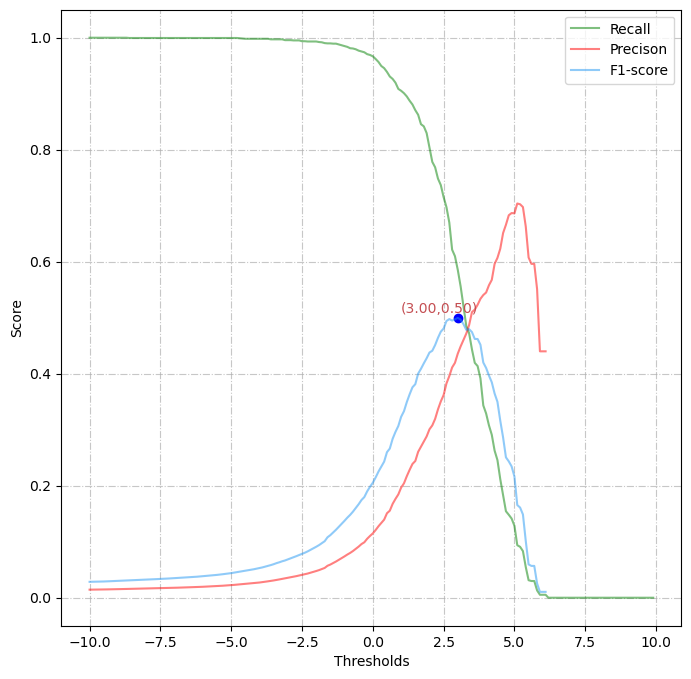

In [35]:
def plot_PRF(predict_df):
    f, ax = plt.subplots(figsize=(8,8))
    alpha=0.5
    ymax = predict_df["F1-Score"].max()
    xmax = thresholds[predict_df["F1-Score"].idxmax()]
#     print(xmax)
    plt.scatter(xmax,ymax,color='blue')
#     plt.plot([xmax,xmax],[0,ymax],color='gray',linestyle='--',lw=1)
#     plt.plot([thresholds[0],xmax],[ymax,ymax],color='gray',linestyle='--',lw=1)
    plt.text(xmax-2,ymax+0.01,f"({xmax:.2f},{ymax:.2f})",color='r')
    plt.plot(thresholds,predict_df["Recall"], color='green', label='Recall',alpha=alpha)
    plt.plot(thresholds, predict_df["Precision"], color='red', label='Precison',alpha=alpha)
    plt.plot(thresholds, predict_df["F1-Score"], color='#2196f3', label='F1-score',alpha=alpha)
    plt.xlabel("Thresholds")
    plt.ylabel("Score")
#     plt.xticks(np.arange(0,1.1,0.1))
#     plt.yticks(np.arange(0,1.1,0.1))
#     plt.xlim([-0.05,0.9])
    plt.legend(loc="upper right") # 图标在外侧
    plt.grid(linestyle='-.',alpha=0.7)
#     plt.axhline(y=0,ls=":",c="yellow")
#     plt.axvline(x=4,ls="-",c="green")
    plt.show()
   
    return f,xmax
plt.style.use("default")
f,th_best=plot_PRF(BNpredict_df)
f.savefig(f"{output_name}/Different Threshold Predictions.png",dpi=120)

Precision :0.4358882521489971, Recall:0.5853775853775853,f1_score:0.4996920550195032,Acc:0.9838828081081975,FPR:0.010561538564703673,Sp:0.9894384614352963


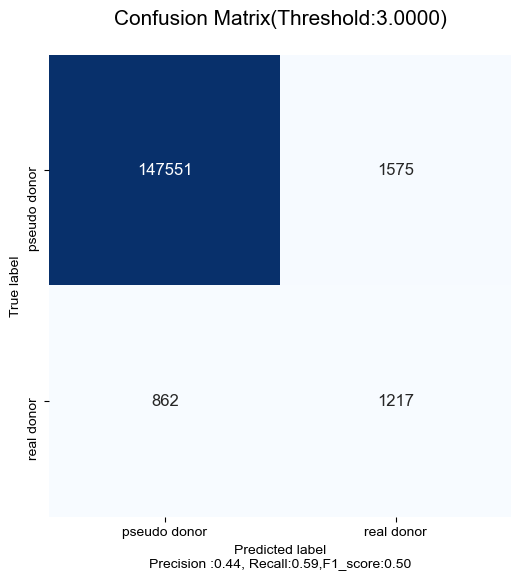

In [36]:

predict_label =[1 if i >th_best else 0 for i in BN_predict_scores]
draw_confusion_matrix(BN_test_labels, predict_label,name=f"confusion_matrix_p_{th_best:.4f}",threshold=f'{th_best:.4f}')